In [310]:
import random
import numpy as np
# np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [311]:
class Individual:
    def __init__(self, species, sex, size):
        self.species = species


        self.size = size
        self.sex = sex
        self.mating_attempts = 0

    def __repr__(self):
        return f"Ind(sp.={self.species}, sex={self.sex}, size={self.size})"

In [312]:
class parameter_set:
    def __init__(self, num_generations, initial_num_individuals, max_mating_attempts, mate_acceptance_scaling_factor, dispersal_rate, mean_size_A, mean_size_B, std_dev, sex_ratio, number_of_offsprings , density_dependent_mortality_factor, viability_mortality_factor):
        self.num_generations = num_generations
        self.initial_num_individuals = initial_num_individuals

        self.max_mating_attempts = max_mating_attempts
        self.mate_acceptance_scaling_factor = mate_acceptance_scaling_factor

        self.dispersal_rate = dispersal_rate

        self.mean_size_A = mean_size_A
        self.mean_size_B = mean_size_B
        self.std_dev = std_dev

        self.sex_ratio = sex_ratio
        self.number_of_offsprings = number_of_offsprings
        
        self.density_dependent_mortality_factor = density_dependent_mortality_factor
        self.viability_mortality_factor = viability_mortality_factor

In [313]:
parameters_instance = parameter_set(
    num_generations=100,
    initial_num_individuals=1000,
    max_mating_attempts=3,
    mate_acceptance_scaling_factor=1.1,
    dispersal_rate=0.1,
    mean_size_A=0.4,
    mean_size_B=0.6,
    std_dev=0.1,
    sex_ratio=0.5,
    number_of_offsprings=3,
    density_dependent_mortality_factor=0.0005,
    viability_mortality_factor=0.01
)

In [314]:
def mutual_A_uni_B(male, female, parameters_instance):


    #size adjustments to ensure within 0 and 1
    if male.size > 1:
        male.size == 1
    if female.size > 1:
        female.size == 1 
    if male.size < 0:
        male.size == 0
    if female.size < 0:
        female.size == 0

    #probability of accepting a mate each species. A prefers small, B prefers large
    if male.species == "A":
        male_accepting_probabilty = 1-female.size

    if male.species == "B":
        male_accepting_probabilty = 0.5
    if female.species == "A":
        female_accepting_probabilty = 1 - male.size

    if female.species == "B":
        female_accepting_probabilty = male.size

    # print("mating attempt", male, female)


    if np.random.rand() < parameters_instance.mate_acceptance_scaling_factor*male_accepting_probabilty*female_accepting_probabilty:
        # print("mating success")
        return True
    else:
        return False

In [315]:
def mutual_mate_choice_for_both(male, female, parameters_instance):


    #size adjustments to ensure within 0 and 1
    if male.size > 1:
        male.size == 1
    if female.size > 1:
        female.size == 1 
    if male.size < 0:
        male.size == 0
    if female.size < 0:
        female.size == 0

    #probability of accepting a mate each species. A prefers small, B prefers large
    if male.species == "A":
        male_accepting_probabilty = 1-female.size

    if male.species == "B":
        male_accepting_probabilty = female.size

    if female.species == "A":
        female_accepting_probabilty = 1 - male.size

    if female.species == "B":
        female_accepting_probabilty = male.size

    # print("mating attempt", male, female)


    if np.random.rand() < parameters_instance.mate_acceptance_scaling_factor*male_accepting_probabilty*female_accepting_probabilty:
        # print("mating success")
        return True
    else:
        return False

In [316]:
def unidirectional_mate_choice_for_both(male, female, parameters_instance):

    #size adjustments to ensure within 0 and 1
    if male.size > 1:
        male.size == 1
    if female.size > 1:
        female.size == 1 
    if male.size < 0:
        male.size == 0
    if female.size < 0:
        female.size == 0

    #probability of accepting a mate each species. A prefers small, B prefers large
    if male.species == "A":
        male_accepting_probabilty = 0.5

    if male.species == "B":
        male_accepting_probabilty = 0.5

    if female.species == "A":
        female_accepting_probabilty = 1 - male.size

    if female.species == "B":
        female_accepting_probabilty = male.size

    # print("mating attempt", male, female)


    if np.random.rand() < parameters_instance.mate_acceptance_scaling_factor*male_accepting_probabilty*female_accepting_probabilty:
        # print("mating success")
        return True
    else:
        return False

In [317]:
#reproduction within one generation function

def reproduction_one_generation_one_patch(patch_population_list, mate_choice_function, parameters_instance):


    females_patch_list = [individual for individual in patch_population_list if individual.sex == 'female']
    males_patch_list = [individual for individual in patch_population_list if individual.sex == "male"]

    #patch A
    mating_pool_females_patch= females_patch_list.copy()
    mating_pool_males_patch = males_patch_list.copy()

    # print("mating pools male, female" , mating_pool_females_patch, mating_pool_males_patch)
  
    offspring_list = []

    while len(mating_pool_females_patch) > int(0.1*len(females_patch_list)) and len(mating_pool_males_patch) > int(0.1*len(males_patch_list)):
          #stopping rule - simulations proceed until 90% of the females have mated (might need a change)
        
        female_for_mating = np.random.choice(mating_pool_females_patch)
        male_for_mating = np.random.choice(mating_pool_males_patch)

        male_for_mating.mating_attempts += 1

        if male_for_mating.mating_attempts == parameters_instance.max_mating_attempts:
            mating_pool_males_patch.remove(male_for_mating)
        

        if mate_choice_function(male_for_mating, female_for_mating, parameters_instance) == True:
            mating_pool_females_patch.remove(female_for_mating)

            if male_for_mating.species == "A" and female_for_mating.species == "A":

                minimum_size_A = min(male_for_mating.size, female_for_mating.size)
                maximum_size_A = max(male_for_mating.size, female_for_mating.size)

                for k in range(parameters_instance.number_of_offsprings):
                    random_val = np.random.beta(2, 2, 1)[0]
                    offspring = Individual(species='A', sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size = random_val*minimum_size_A + maximum_size_A*(1-random_val))
                    offspring_list.append(offspring)

            if male_for_mating.species == "B" and female_for_mating.species == "B":

                minimum_size_B = min(male_for_mating.size, female_for_mating.size)
                maximum_size_B = max(male_for_mating.size, female_for_mating.size)

                for k in range(parameters_instance.number_of_offsprings):
                    random_val = np.random.beta(2, 2, 1)[0]
                    offspring = Individual(species='B', sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size = random_val*minimum_size_B + maximum_size_B*(1-random_val))
                    offspring_list.append(offspring)


    offspring_list_before_regulation = offspring_list.copy()

    # print(offspring_list_before_regulation)

    #viability selection
    random.shuffle(offspring_list_before_regulation)
    population_size_before_regulation = len(offspring_list_before_regulation)

    population_viability_mortality_number = int(parameters_instance.viability_mortality_factor*population_size_before_regulation)

    if population_viability_mortality_number > 0:
        poulation_list_after_viability_selection = offspring_list_before_regulation[:-population_viability_mortality_number]
    else:
        poulation_list_after_viability_selection = offspring_list_before_regulation

    # print(poulation_list_after_viability_selection, "after viability")

    #density selection 
    population_size_after_viability_selection = len(poulation_list_after_viability_selection)
    population_density_mortality_number = int(parameters_instance.density_dependent_mortality_factor*(population_size_after_viability_selection**2))

    if population_density_mortality_number > 0:
        population_list_after_density_selection = poulation_list_after_viability_selection[:-population_density_mortality_number]
    else:
        population_list_after_density_selection = poulation_list_after_viability_selection

    return population_list_after_density_selection

In [318]:
def migration_between_two_patches(list_A, list_B, parameters_instance):

    number_of_individuals_to_dispers_from_A = int((parameters_instance.dispersal_rate)*len(list_A))

    individuals_to_disperse_from_A_to_B = list_A[:number_of_individuals_to_dispers_from_A]
    individuals_remaining_in_A = list_A[number_of_individuals_to_dispers_from_A:]

    number_of_individuals_to_dispers_from_B = int((parameters_instance.dispersal_rate)*len(list_B))

    individuals_to_disperse_from_B_to_A = list_B[:number_of_individuals_to_dispers_from_B]
    individuals_remaining_in_B = list_B[number_of_individuals_to_dispers_from_B:]
    
    list_A_new = individuals_remaining_in_A + individuals_to_disperse_from_B_to_A
    list_B_new = individuals_remaining_in_B + individuals_to_disperse_from_A_to_B
    
    return list_A_new, list_B_new

In [319]:
def reproduction_and_migration_function(patch_population_list_A, patch_population_list_B, parameters_instance, mate_choice_function):

    patch_A_after_reproduction = reproduction_one_generation_one_patch(patch_population_list_A, mate_choice_function, parameters_instance)
    patch_B_after_reproduction = reproduction_one_generation_one_patch(patch_population_list_B, mate_choice_function, parameters_instance)

    patch_A_after_migration, patch_B_after_migration = migration_between_two_patches(patch_A_after_reproduction, patch_B_after_reproduction, parameters_instance)

    return patch_A_after_migration, patch_B_after_migration

In [320]:
def count_species(individuals_list):
    count_a = sum(1 for individual in individuals_list if individual.species == "A")
    count_b = sum(1 for individual in individuals_list if individual.species == "B")
    return count_a, count_b


# Counting species A and species B


In [321]:
def visualize_species_over_time(species_counts_history, mate_choice_function):
    generations = np.arange(len(species_counts_history))
    total_A_counts = [counts["total_A_count"] for counts in species_counts_history]
    total_B_counts = [counts["total_B_count"] for counts in species_counts_history]

    plt.figure(figsize=(10, 5))
    plt.plot(generations, total_A_counts, label='Species A', color='red')
    plt.plot(generations, total_B_counts, label='Species B', color='blue')
    plt.xlabel('Generations')
    plt.ylabel('Population Count')
    plt.title('Population Dynamics Over Generations :' + str(mate_choice_function))
    plt.legend()
    plt.show()

def visualize_species_in_patches(species_counts_history, patches=('PATCH_A', 'PATCH_B'), generations_to_sample=(0, 25, 50, 75)):
    fig, axs = plt.subplots(len(patches), len(generations_to_sample), figsize=(15, 8))

    for i, patch in enumerate(patches):
        for j, gen in enumerate(generations_to_sample):
            index = min(gen, len(species_counts_history) - 1)
            counts = species_counts_history[index][patch]
            species_labels = list(counts.keys())
            species_counts = list(counts.values())
            axs[i, j].bar(species_labels, species_counts, color=['red', 'blue'])
            axs[i, j].set_title(f'{patch} at Generation {gen}')
    
    plt.tight_layout()
    plt.show()

In [322]:
def reproduction_over_generations(parameters_instance, mate_choice_function):

    Initial_patch_1 = [Individual(species='A', sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size=np.random.normal(parameters_instance.mean_size_A, parameters_instance.std_dev)) for _ in range(parameters_instance.initial_num_individuals)]
    Initial_patch_2 = [Individual(species='B', sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size=np.random.normal(parameters_instance.mean_size_B, parameters_instance.std_dev)) for _ in range(parameters_instance.initial_num_individuals)]

    # if parameters_instance.initial_seperation = False

    

    patch_population_list_1 = Initial_patch_1
    patch_population_list_2 = Initial_patch_2

    species_count_history = []
    generation_count_till_end = 0
    for i in range(parameters_instance.num_generations):
        patch_population_list_1, patch_population_list_2 = reproduction_and_migration_function(patch_population_list_1, patch_population_list_2, parameters_instance, mate_choice_function)
        count_species_A_patch_1, count_species_B_patch_1 = count_species(patch_population_list_1)
        count_species_A_patch_2, count_species_B_patch_2 = count_species(patch_population_list_2)

        total_A_count = count_species_A_patch_1 + count_species_A_patch_2
        total_B_count = count_species_B_patch_1 + count_species_B_patch_2

        species_counts = ({"total_A_count": total_A_count, "total_B_count": total_B_count, "PATCH_1": {"species_A_count": count_species_A_patch_1, "species_B_count": count_species_B_patch_1}, "PATCH_2": {"species_A_count": count_species_A_patch_2, "species_B_count": count_species_B_patch_2}})

                        
        # print(species_counts)

        species_count_history.append(species_counts)
        

        # print(total_A_count, "species A", total_B_count, "species B")
        # print("PATCH A:", count_species_A_patch_A, " B count:", count_species_B_patch_A, "PATCH B:", count_species_A_patch_B, " B count:", count_species_B_patch_B)

        generation_count_till_end += 1
        
        if total_A_count == 0 or total_B_count == 0:
            break
    
    visualize_species_over_time(species_count_history, mate_choice_function)
    visualize_species_in_patches(species_count_history, patches=('PATCH_1', 'PATCH_2'), generations_to_sample=(0, 25, 50, 75))
    
    return species_count_history, generation_count_till_end



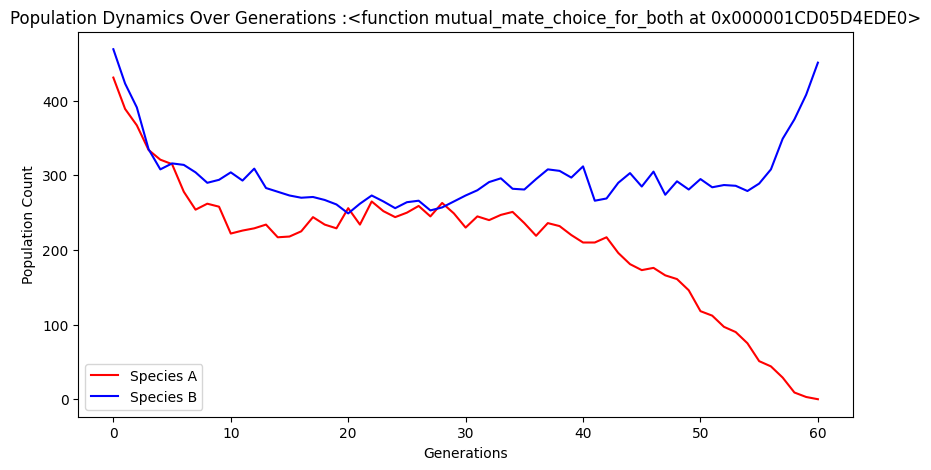

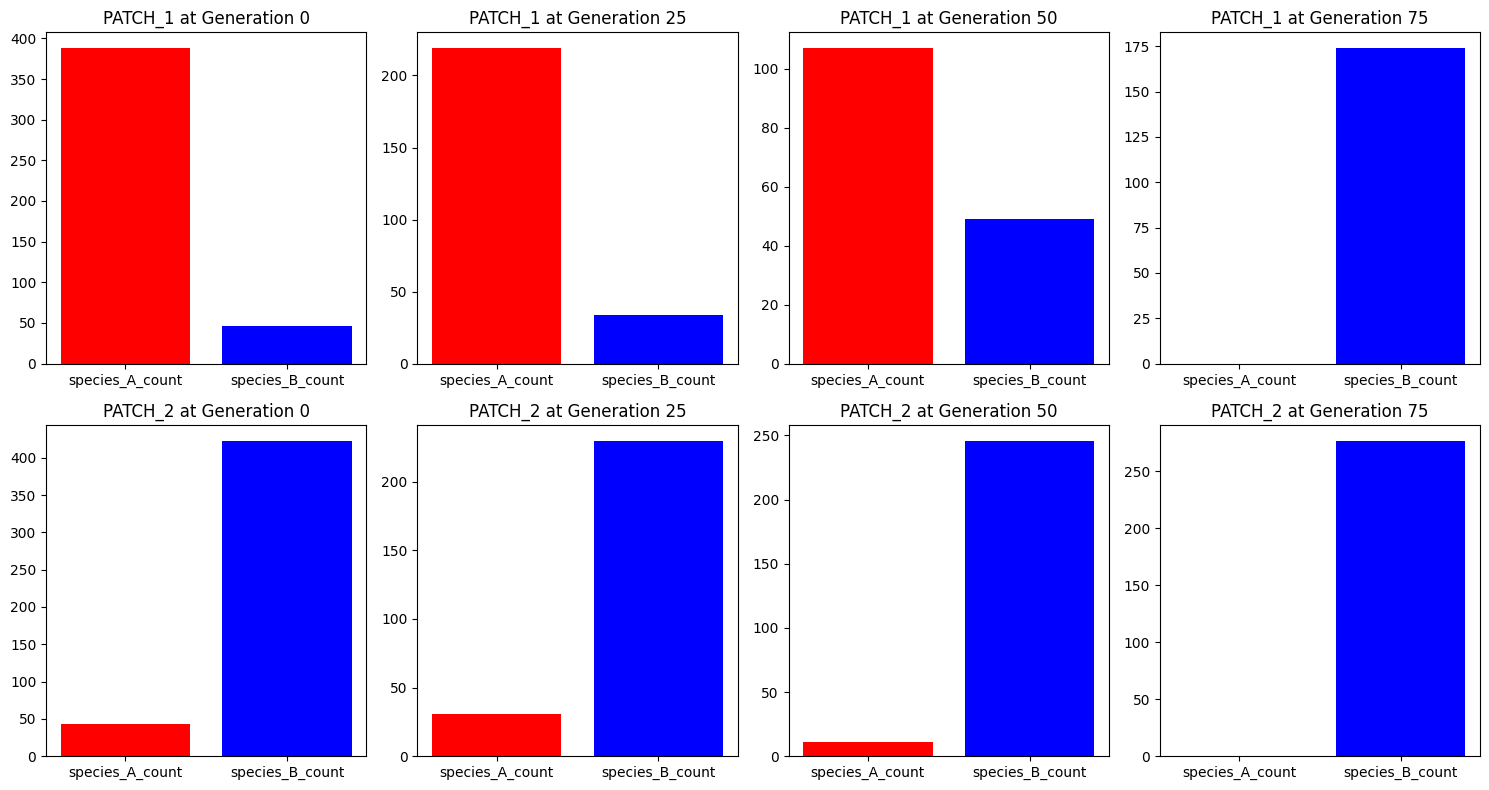

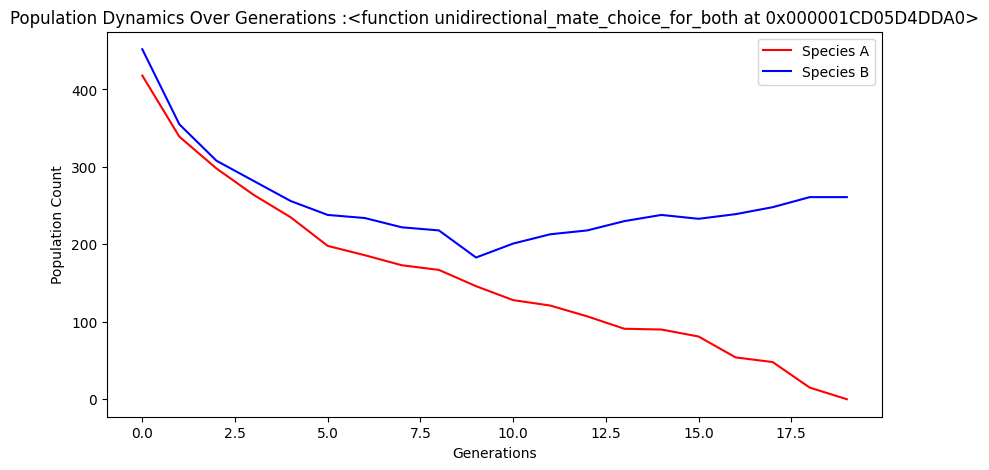

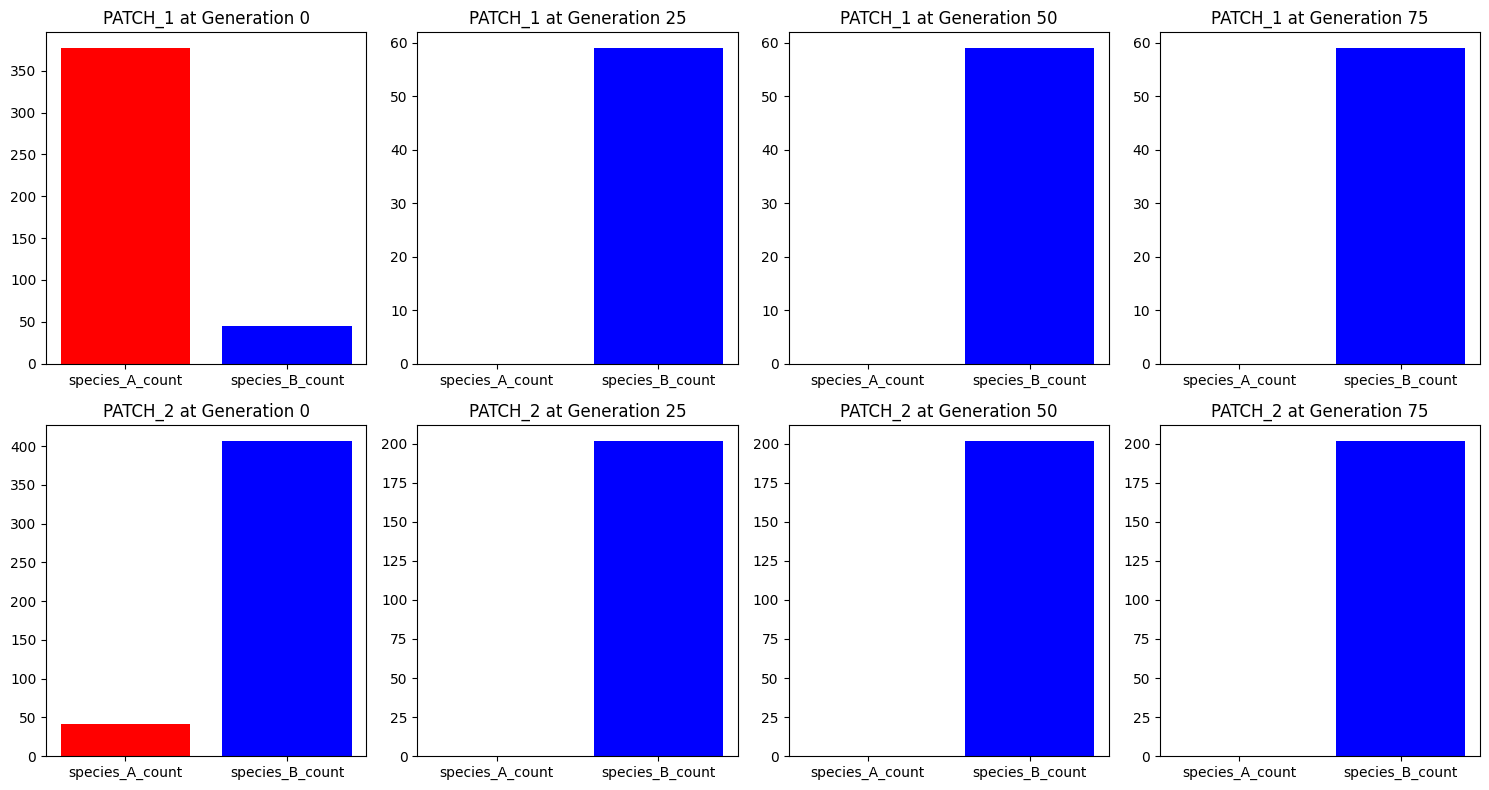

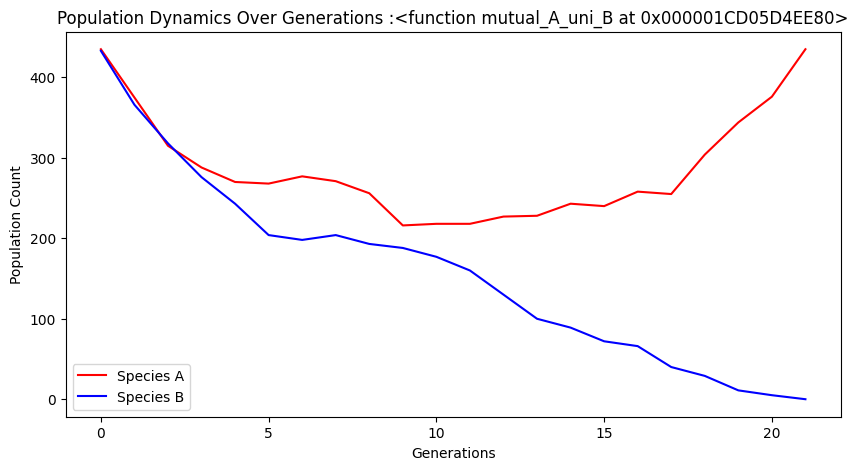

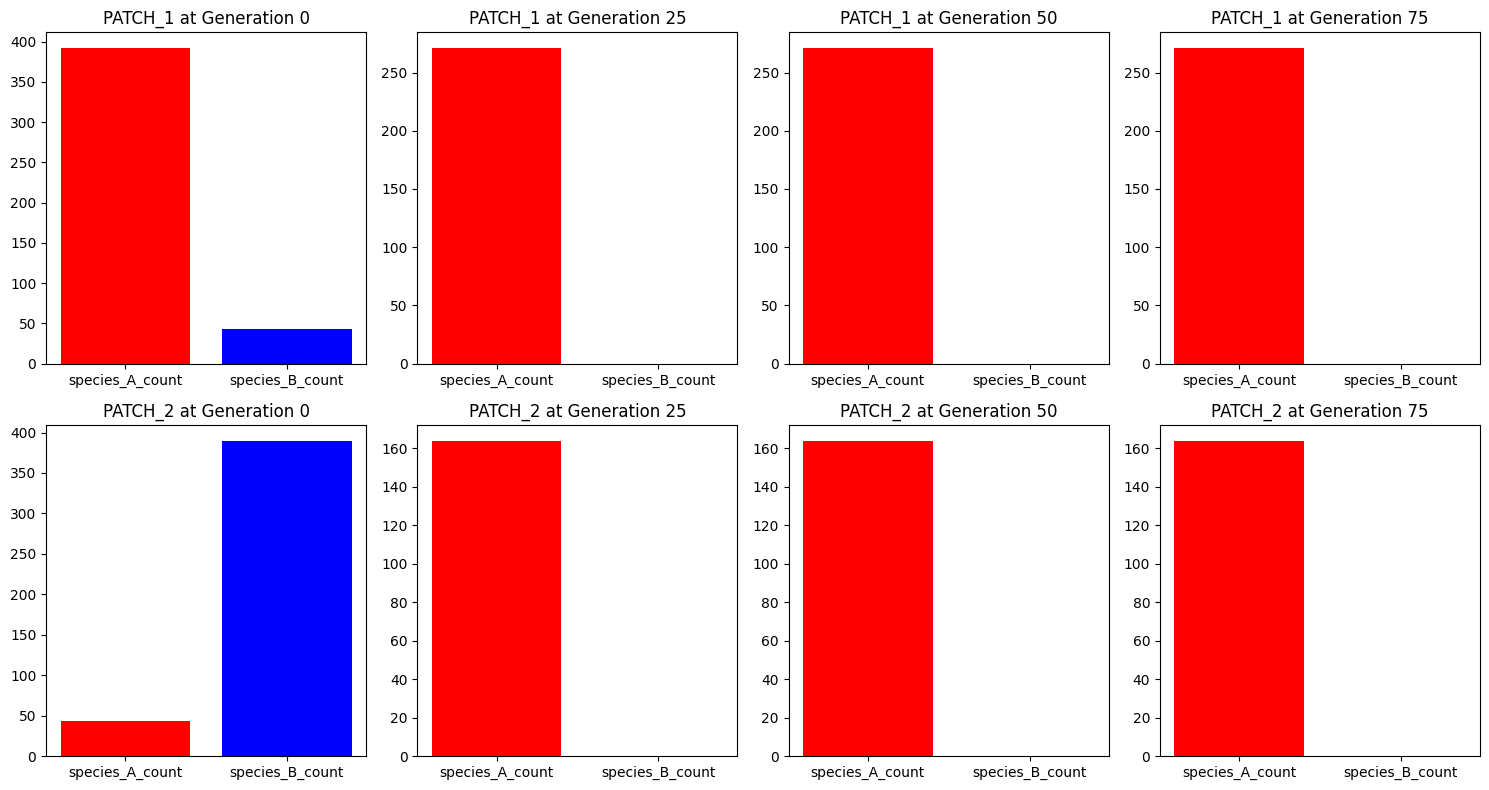

In [323]:
species_count_history_mutual_both, generation_count_till_end_mutual_both= reproduction_over_generations(parameters_instance, mutual_mate_choice_for_both)
species_count_history_uni_both, generation_count_till_end_uni_both= reproduction_over_generations(parameters_instance, unidirectional_mate_choice_for_both)
species_count_history_mutual_vs_uni, generation_count_till_end_mutual_vs_uni= reproduction_over_generations(parameters_instance, mutual_A_uni_B)




In [324]:
def average_number_of_generations_until_end(parameters_instance, mate_choice_function):
    number_of_generations_list = []
    for i in range(20):
        number_of_generations = reproduction_over_generations(parameters_instance, mate_choice_function)
        number_of_generations_list.append(number_of_generations)
    print(parameter_set.sex_ratio ,"checkk")
    return np.mean(number_of_generations_list)

In [325]:
# average_number_of_generations_until_end(parameters_instance, mutual_mate_choice_for_both)

In [326]:
# def mutual_vs_unidirectional_extinctions_for_given_parameter_set(parameters_instance):
#     average_generations_until_end_of_simulation_mutual = average_number_of_generations_until_end(parameters_instance, mutual_mate_choice_for_both)
#     average_generations_until_end_of_simulation_unidirectional = average_number_of_generations_until_end(parameters_instance, unidirectional_mate_choice_for_both)
#     return average_generations_until_end_of_simulation_mutual, average_generations_until_end_of_simulation_unidirectional


# average_generations_until_end_of_simulation_mutual, average_generations_until_end_of_simulation_unidirectional = mutual_vs_unidirectional_extinctions_for_given_parameter_set(parameters_instance)


# print("Average number of generations until end of simulation for mutual mate choice:", average_generations_until_end_of_simulation_mutual)
# print("Average number of generations until end of simulation for unidirectional mate choice:", average_generations_until_end_of_simulation_unidirectional)

In [327]:
# for k in [0.25, 0.5, 0.75]:
#     parameter_set.sex_ratio = k

#     average_generations_until_end_of_simulation_mutual, average_generations_until_end_of_simulation_unidirectional = mutual_vs_unidirectional_extinctions_for_given_parameter_set(parameters_instance)
#     print("Average number of generations until end of simulation for mutual mate choice:", average_generations_until_end_of_simulation_mutual)
#     print("Average number of generations until end of simulation for unidirectional mate choice:", average_generations_until_end_of_simulation_unidirectional)

In [328]:
Initial_patch_1_random_Sp= [Individual(species = np.random.choice(["A", "B"]), sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size=np.random.normal(parameters_instance.mean_size_A, parameters_instance.std_dev)) for _ in range(parameters_instance.initial_num_individuals)]
Initial_patch_2_random_sp = [Individual(species = np.random.choice(["A", "B"]), sex='female' if np.random.rand() < parameters_instance.sex_ratio else 'male', size=np.random.normal(parameters_instance.mean_size_B, parameters_instance.std_dev)) for _ in range(parameters_instance.initial_num_individuals)]

print(Initial_patch_1_random_Sp)

[Ind(sp.=B, sex=female, size=0.4890424165578952), Ind(sp.=B, sex=male, size=0.458650858052534), Ind(sp.=B, sex=female, size=0.3718145237286897), Ind(sp.=B, sex=male, size=0.2579107484165566), Ind(sp.=A, sex=male, size=0.39969724791592814), Ind(sp.=B, sex=female, size=0.20390319563722878), Ind(sp.=A, sex=female, size=0.4391077581271781), Ind(sp.=A, sex=female, size=0.35349250473005744), Ind(sp.=A, sex=male, size=0.4126495529245897), Ind(sp.=A, sex=female, size=0.48436118292514624), Ind(sp.=B, sex=female, size=0.48343734614844047), Ind(sp.=B, sex=female, size=0.37981265358056193), Ind(sp.=A, sex=male, size=0.4232740429227604), Ind(sp.=A, sex=female, size=0.5641983155847748), Ind(sp.=B, sex=female, size=0.22678698289328647), Ind(sp.=A, sex=male, size=0.24642486902778496), Ind(sp.=A, sex=male, size=0.5278393359731073), Ind(sp.=B, sex=female, size=0.2964993283983517), Ind(sp.=B, sex=male, size=0.3636260280453309), Ind(sp.=B, sex=female, size=0.44115183397701074), Ind(sp.=A, sex=male, size=0